# Esercitazione 10 
## Simulated Annealing
## Spiegazione programma ./SA/TSP.cpp
Il programma ha la stessa struttura del programma dell'esercitazione 9, qui di seguito elenchiamo le modifiche:  
- in input dal file *input.dat* vengono letti il numero di Temperature (N_temp), la probabilità di mutazione (pb_mut) e key, che se uguale a 0 il programma risolve il problema del TSP su una circonferenza, altrimenti su un cerchio.
- Viene letto il file "Temp_step.dat", formato da due colonne, nella prima c'è la temperatura mentre nella seconda il numero di step del simulated annaealing (a quella data temperatura).
- Dopo aver inizializzato il programma, ci sono tre cicli annidati, il più esterno è sulle temperature, poi sugli step a quella data temperatura e il più interno sui percorsi.  
- Nel ciclo più interno, avviene con una certa probabilità la mutazione del percorso nella function **Mutation** e subisce il test Metropolis nella funzione **Metropolis**.  
- Alla fine del ciclo più interno, c'è la scrittura su file in **Averages**, i file di output sono:  **"BsL1.out"**, su cui viene scritto il valore di $L^{(1)}$ valutata al miglior percorso e **"BsPath.out"**, su cui è scritto il miglior percorso.  

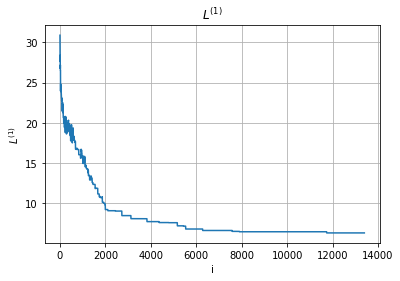

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#input file
N=13400
l1_b = np.zeros(N)
file_data = np.loadtxt('BsL1.out', usecols=(1))
l1_b = file_data[:]
i = np.arange(N)

plt.plot(i,l1_b)
plt.title('$L^{(1)}$')
#plt.legend(['Best','Best Half'], loc='best')
plt.xlabel('i')
plt.ylabel('$L^{(1)}$')
#plt.ylim([2,3])
#plt.savefig('Pictures/square_l1', dpi=300)
plt.grid(True)
plt.show()


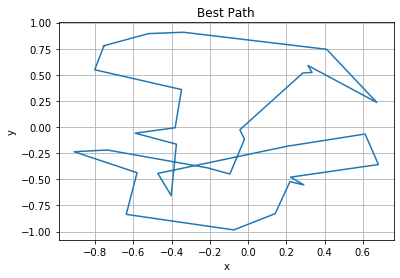

In [19]:
Nct=32
x = np.zeros(Nct)
y = np.zeros(Nct) 
file_data = np.loadtxt('BsPath.out', usecols=(0,1))
x = file_data[:,0]
y = file_data[:,1]

plt.plot(x,y)
plt.title('Best Path')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('Pictures/square_bspath', dpi=300)
plt.grid(True)
plt.show()

# 32 città su una circonferenza
<img src="./SA/Pictures/circ_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso:  6.34685

Non è stato raggiunto il minimo globale, ma un minimo locale.  La funzione $L^{(1)}$ calcolata con il simulated annealing è più grande rispetto a quella del GA.
<img src="./SA/Pictures/circ_bspath.png" alt="Drawing" style="width: 500px;"/>

# 32 città su un quadrato
<img src="./SA/Pictures/square_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso:  10.6609

$L^{(1)}$ finale ha un valore maggiore rispetto al risultato ottenuto con il GA.
<img src="./SA/Pictures/square_bspath.png" alt="Drawing" style="width: 500px;"/>

# Genetic Search with 4 parallel GA
## Spiegazione programma ./GA_parallel/TSP.cpp
Il programma è molto simile a quello del GA della nona esercitazione, solo che qui nel main ci sono tre cicli annidati, il più esterno è sulle migrazioni, il secondo sugli step del GA e il terzo sui percorsi.  

Alla fine del ciclo sugli step del GA, avviene la migrazione con la funzione **Migration**, in cui i nodi vengono accoppiati in modo casuale e mandano tra loro (all'interno della coppia) un messaggio bidirezionale. Per esempio, il nodo 1 si accoppia con il 2, il nodo 1 chiama le subroutine send e receive in quest'ordine mentre il nodo 2 nell'ordine opposto, in questo modo vengono scambiati i migliori 40 percorsi tra i nodi.

Per quanto riguarda gli output sono del tipo:
- AvL1_0, media di L1 tra i migliori 50 percorsi per il nodo 0
- BsL1_0, il valore di L1 del miglior percorso per il nodo 0
- BsPAth_0, il miglior percorso per il nodo 0

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#input file
N=1000
l1 = np.zeros(N)
file_data = np.loadtxt('BsL1_1', usecols=(1))
l1 = file_data[:]
i = np.arange(N)      # [0,1,2,...,N-1]

plt.plot(i,l1)
plt.xlabel('i')
plt.ylabel('$L^{(1)}$')
plt.grid(True)
#plt.savefig('Pictures/square_l1', dpi=300)
plt.show()

Nct=32
x = np.zeros(Nct)
y = np.zeros(Nct) 
file_data = np.loadtxt('BsPath_1', usecols=(0,1))
x = file_data[:,0]
y = file_data[:,1]

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.savefig('Pictures/square_bspath', dpi=300)
plt.show()

# 32 città su una circonferenza
<img src="./GA_parallel/Pictures/circle_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso: 6.33284

E' stato raggiunto il minimo globale.
<img src="./GA_parallel/Pictures/circle_bspath.png" alt="Drawing" style="width: 500px;"/>

# 32 città in un quadrato
<img src="./GA_parallel/Pictures/square_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso: 10.1469
Il risultato è migliorato rispetto a quelli ottenuti con GA e SA.
<img src="./GA_parallel/Pictures/square_bspath.png" alt="Drawing" style="width: 500px;"/>